# 3D Image Reconstruction and Analysis in Medicine
# -----------------Image Analysis Laboratory------------------
# -=-=-=-=-=-=-=Support Vector Machines-=-=-=-=-=-=-

##  A) Binary Classification

### Supprt Vector Machines (SVM) are a powerful class of supervised classification and also regression. In this laboratory we will review the SVM practically and use it for classification problems.

In [4]:
# Just for reading
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import cv2 

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### The purpose here is to define a line in 2D or a manifold in multi-dimensions to divide classes of the data. For instance, consider the following simple case of a 2D data set which are linearly separable.

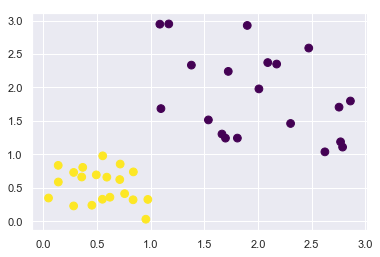

In [5]:
# Just for reading
data = pd.read_csv('Data0.csv', header=None)
X = data.values[:, :2]
y = data.values[:, 2]
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis');

### For this simple case, you can even use a linear equation to separate two classes. However, the problem is that there are many lines that are able to separate the classes. Based on which lines you choose,  a new data point will be either below or above the line and will be assigned to one of the classes. (The point marked by "X" in the following plot).

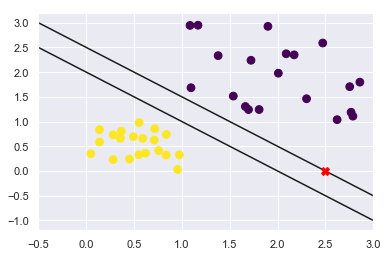

In [6]:
# TODO:
xfit = np.linspace(-0.5, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis')

# TODO: Use the linear equation "Y-y0 = m(X-x0)" and define two different line
# which are able to separate the data points in scatter plot. Then, replace the 
# parameters M1, B1 for the first line and M2 and B2 for the second line.

for m, b in [(-1, 2), (-1,2.5)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.plot([2.5],[0],'X',color='red', markeredgewidth=1, markersize=8)

plt.xlim(-0.5, 3);

# TODO: Was the point "X" assigned to the same class when you used differen separating line?
# Think about a unique solution.

# No, the point is falling in the middle of the line for one of the lines
# Choose the line separating the points with the maximal margins

### It would be possible that the new data point was assigned to a different class based on the lines you choose. One way to solve this problem is to use two lines instead of only one line and maximize the distance between the two new lines (maximize the margins). In fact, using only one line for separation is like to use a zero-width margin. Therefore, we can consider a margin for each line. The line that maximizes this margin is choosen as an optimal line in SVM.

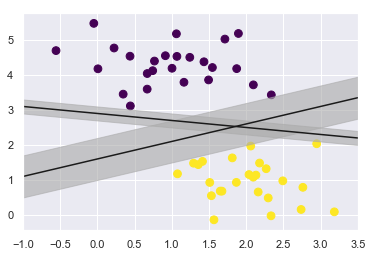

In [10]:
# TODO:

from sklearn.datasets.samples_generator import make_blobs  # Loading the input data
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis')

# TODO: Find two proper values for d1 and d2 which maximize the margins but at the same time
# do not allow the data points to get inside the margins.

for m, b, d in [ (0.5, 1.6, 0.6), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.6)

plt.xlim(-1, 3.5);

### Now, instead of finding the line and margin width manually, we are going to train a model by using a linear SVM to find the optimal parameters.

In [11]:
# just for reading
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)  # Set the linear kernel and a large value of C
model.fit(X, y) # Fitting the data set to the model

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### To understand what SVM does, it is better to visualize how it find the decision boundary.

In [12]:
# just for reading
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='r',
               levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=500, linewidth=10, facecolor='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

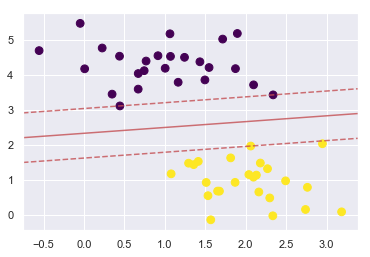

In [13]:
# TODO: Plot the data points distribution using the "plt.scatter"
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis')

# TODO: Call the function "plot_svc_decision_function" to draw the decision boundaries.
plot_svc_decision_function(model);

### In the plot above, there is one solid line (main separating line) and two dashed-lines (margins). Any other lines will have less margins than the one above. Some of the training data points in this plot are placed exactly on the margin lines. In other words, margin lines passed through the middle of these points. These important points are called "Support Vectors" :

In [15]:
# TODO: How many points placed exactly on the dashed lines? 1 yellow point and 2 purple points

# In order to find exacly how many Support Vectors exists, call "model.support_vectors_"
print(len(model.support_vectors_))

3


### In SVMs finding the optimum separatin line completely depends on the position (coordinates) of these Support Vectors. Other points further from the margins are in the correct sides and do not effect the fitting. That is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin. We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

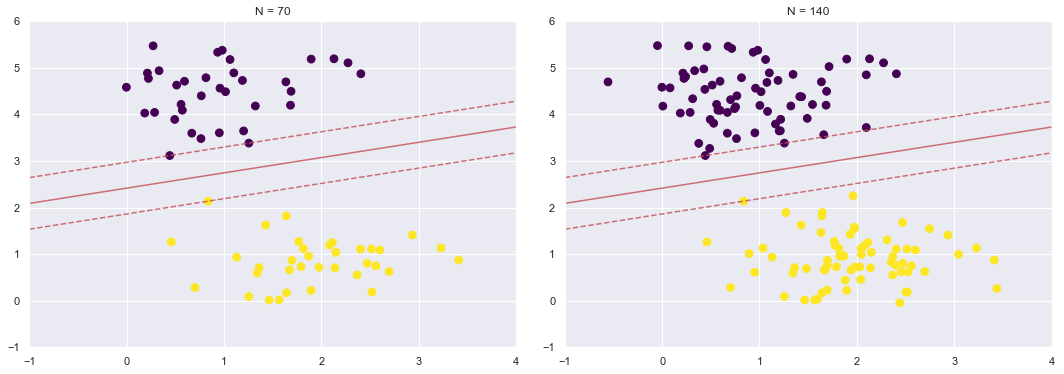

In [16]:
# Just for reading
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [70, 140]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### The above two figures depit that SVM model fits the line using only Support Vectors and the model is not sensitive to other data points. In fact, the left figure contains half of the data points of the right figure, but both of them have the same separating lines because both of them have similar Support Vectors.

In [17]:
# TODO:Change the number of the data points and interpret the results.
from ipywidgets import interact, fixed
interact(plot_svm, N=[8,10,20,50,100,150,180,300,500,2000], ax=fixed(None));

# The continuous line is the same irrespectively of the points used, depending just on the support vectors
# As the number of points is increased, the margins are narrower

interactive(children=(Dropdown(description='N', index=1, options=(8, 10, 20, 50, 100, 150, 180, 300, 500, 2000), value=10), Output()), _dom_classes=('widget-interact',))

### What about non-linear separable data set?

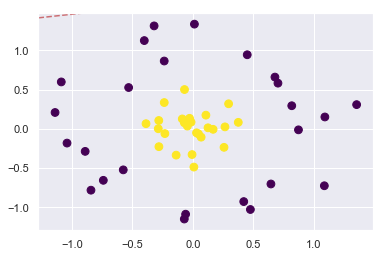

In [21]:
# TODO:
from sklearn.datasets.samples_generator import make_circles  # Load input data
X, y = make_circles(50, factor=.1, noise=0.2)

Model1 = SVC(kernel='linear').fit(X, y) # Fit a linear SVM

# TODO: Plot the data points distribution using the "plt.scatter"
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis')

# TODO: Call the function "plot_svc_decision_function" to draw the decision boundaries.
plot_svc_decision_function(model);

# TODO: Run this cell several times; how do you interpret the results?
# Points are not linearly separable, so the system does not find any possible solution with a linear kernel

### Could you achieve acceptable results? Why?

### One practical way to handle nonlinear separable data set is to use "Kernel Trick". This means we can project our data set to a higher dimension space where the data points are linearly separable there. There are different functions for this projection such as Gaussian (Radial) basis function and polynomials. In other words, we map a nonlinear separable data set to a higher dimension space, artificially,  and then linear separator would be sufficient.

In [22]:
# TODO: Run and play with the angles
# If you want separate the two classes in higher dimenstion linearly, which line will you use?
r = np.exp(-(X ** 2).sum(1))
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=60, cmap='viridis')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,-60,0,30,90], azip=(-180,180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=3, options=(-90, -60, 0, 30, 90), value=30), IntSlider(value=30, description='azim', max=90, min=-30), Output()), _dom_classes=('widget-interact',))

### Training a Kernel-based SVM

In [23]:
# Just for reading
Model2 = SVC(kernel='rbf', C=1E6) # Creating an SVM with Radial Basis Function
Model2.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

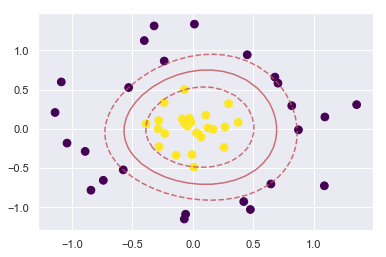

In [25]:
# TODO: Plot the data points distribution using the "plt.scatter"
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='viridis')

# TODO: Call the function "plot_svc_decision_function" to draw the decision boundaries.
plot_svc_decision_function(Model2);

### Soft Margin SVMs: So far we have seen data set with a clear decision boundary; however, in real cases data points from different classes often overlap each other:

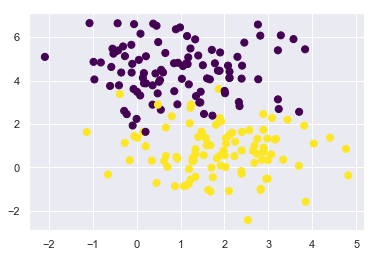

In [26]:
# TODO: 
X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');
# TODO: Is it possible to use linear or even kernel based SVM to classify these data? No

### In previous examples there were a parameter "C" which we set it as a very large number. The role of this parameter is to prevent the data points from appearing inside the margins. The larger this value the lower the chance of data points inside the margins. Accordingly, if we do not allow any points to appear inside the margins we have a "Hard Margin SVM" like what we did in previous examples. On the other hand, we can allow the margins to be softer and can encompass some of the data points.

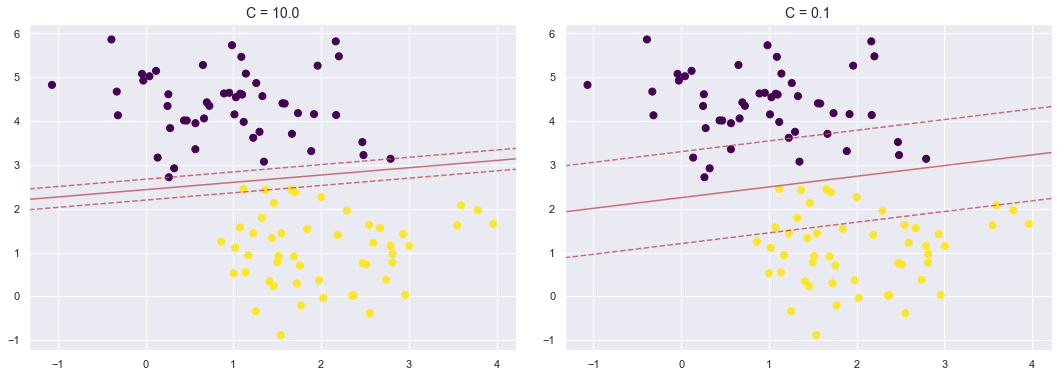

In [27]:
# TODO:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8) # Input Data

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    
# TODO: How can you compare these to figures? As C is decreased, the margins are softer

## B) Multi-Classification Problem Examples:

### The idea is to train an SVM classifier using Iris data set with different Kernels. Iris data set contains 4 features for each data point including Sepal length, Sepal width, Petal length and Petal width all in cm. The target class of these data are Setosa, Versicolor, Virginica. 

In [28]:
# Just for reading
from sklearn import datasets # To Get iris dataset
from sklearn import svm    # To fit the svm classifier
# import iris data to model Svm classifier
iris_dataset = datasets.load_iris()
print ("Iris data set Description = ", iris_dataset['DESCR'])
print ("Iris targets = ", iris_dataset['target'])

Iris data set Description =  Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Miss

### We can visualize different features with the corresponding targets. For instance, visualizing Sepal length & width and the corresponding targets.

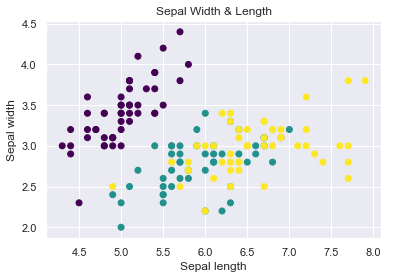

In [32]:
# Read
def visuvalize_sepal_data():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width & Length')
    plt.show()
visuvalize_sepal_data()

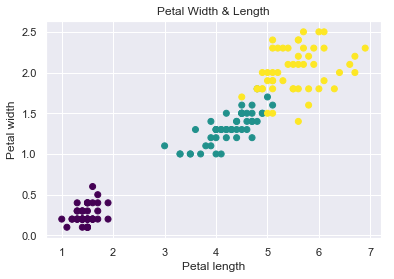

In [37]:
# TODO: Repeat the previous cells but for the last two features. (Petal length and width)
def visuvalize_sepal_data():
    iris = datasets.load_iris()
    X = iris.data[:, 2:]  # we only take the last two features.
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.show()
visuvalize_sepal_data()

### Modelling different kernel SVM by using only the Sepal features (Length and Width) and the Petal features (Lenght and Width) separately.

In [46]:
# TODO:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the Sepal two features.
y = iris.target
C = 1  # SVM regularization parameter
 
# SVM with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# TODO: the same with "rbf" kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=20, C=C).fit(X, y)


# TODO: the same with "poly" kernel (polynomial)
poly_svc = svm.SVC(kernel='poly', gamma=0.5,degree=5, C=C).fit(X, y)

###  In order to understand how well the SVM models classified the data, we can visualize it.

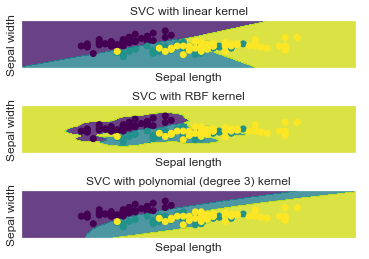

In [47]:
# Reading
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(3, 1, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.8)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
 
	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()

In [ ]:
# TODO: Change the parameters C, standard deviation of RBF kernels (gammas) and polynomial order (degree)
# and find out how they effect the output. 

# As gamma and degree are increased, the result is more accurate, but it is also more prone to overfitting

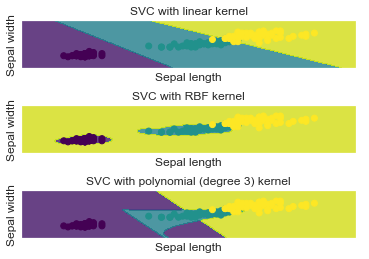

In [49]:
# TODO: Perform the whole previous task for Petal fearures X = iris.data[:, 2:]
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the Sepal two features.
y = iris.target
C = 1  # SVM regularization parameter
 
# SVM with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# TODO: the same with "rbf" kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=20, C=C).fit(X, y)


# TODO: the same with "poly" kernel (polynomial)
poly_svc = svm.SVC(kernel='poly', gamma=0.5,degree=5, C=C).fit(X, y)

# Reading
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(3, 1, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.8)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
 
	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()

# C) Train and Test with SVM

### We are going to use a data set (Data1.csv) which contains 216 rows represented 216 individuals from which 100 features extracted from their clinical Proteomics. Out of them 121 are ovarian cancer patients and 95 are normal patients. The target labels presented by 1 and -1 in the last column.

In [50]:
# Read
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('Data1.csv', header=None) # Input data

### The purpose is to divide the data set into train and test set, use the training data to learn the model and by test data, evaluate how well the model learns.

In [59]:
# TODO: set the first 99 columns as input data
X = data.values[:,:100]

# TODO: set the last column as targets
y = data.values[:,100]

# TODO: Call the "train_test_split" to split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [60]:
# TODO:
C = 1
Model4 = SVC(kernel='linear', C=C) # create a linear model
Model4.fit(X_train,y_train) # apply the training data to the model

# TODO: call the "predict" function on test data set 
y_pred = Model4.predict(X_test) 

print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9318181818181818


In [61]:
#TODO: Repeat the whole previous cell for 'rbf' kernel
C = 1
Model4 = SVC(kernel='rbf', C=C) # create a linear model
Model4.fit(X_train,y_train) # apply the training data to the model

# TODO: call the "predict" function on test data set 
y_pred = Model4.predict(X_test) 

print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9090909090909091


In [62]:
#TODO: Repeat the whole previous cell for 'poly' kernel
C = 1
Model4 = SVC(kernel='poly', C=C) # create a linear model
Model4.fit(X_train,y_train) # apply the training data to the model

# TODO: call the "predict" function on test data set 
y_pred = Model4.predict(X_test) 

print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8636363636363636


In [64]:
# Performing K-fold cross validation with Linear kernel
from sklearn.cross_validation import cross_val_score
Model7 = SVC(kernel='linear')

# TODO: play with the parameter cv and find out how it works.
scores = cross_val_score(Model7, X, y, cv=3, scoring='accuracy') #cv is cross validation
print(scores)

# TODO: How cross validation would help the classification task?
# TODO: Can you explain the achieved scores in terms of bias-variance matter?

# Cross-validation takes different samples of training and testing data, combining different results --> ROBUST
# As more data are used for training, the bias is reduced, but the variance increases

[0.89041096 0.95833333 0.97183099]


#### Taking all the values of C and checking out the accuracy score with kernel as linear.
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such amanner that it generalised the unseen data well.

Text(0,0.5,'Cross-Validated Accuracy')

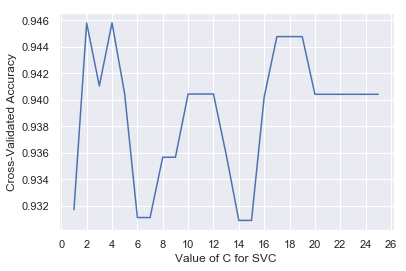

In [65]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    Model8 = SVC(kernel='linear', C=c)
    scores = cross_val_score(Model8, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())  
%matplotlib inline
C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# TODO: How do you assess the value of C? As C is decreased, the margins are softer, so that accuracy is reduced

### Now, we are using the raw intensity values of two set of images, Breast and Bladder. The images were rescaled to the size of 40 by 40. The breast label were set as 1 and bladder label were set as 0.

In [66]:
# TODO: read the "RawPixels.csv" using "pd.read_csv"
data = pd.read_csv('RawPixels.csv')
X = data.values[:, :1600] # input data
y = data.values[:, 1600] # targets

# TODO: Call the "train_test_split" to split the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

C = 1
Model9 = SVC(kernel='linear', C=C)
Model9.fit(X_train,y_train)

y_pred = Model9.predict(X_test) 
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 1.0


##### Good Luck